# Estación Villaverde

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_17.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,49.774194
2013-02-01,37.741935
2013-03-01,27.387097
2013-04-01,26.354839
2013-05-01,26.258065


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

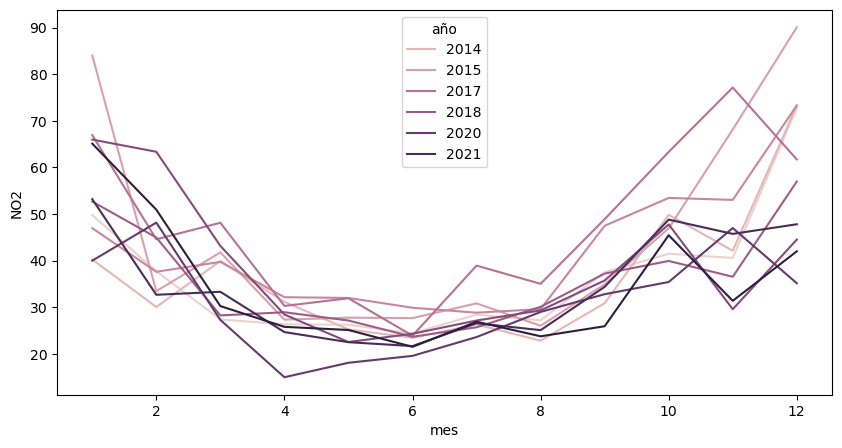

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

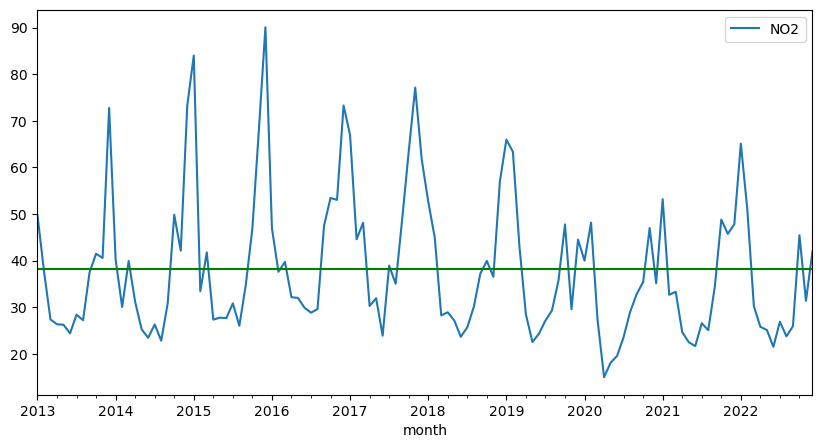

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

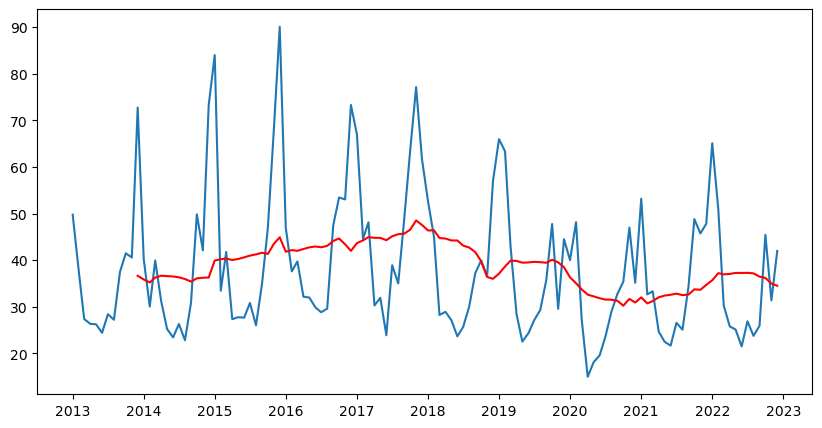

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,49.774194
2013-02-01,37.741935
2013-03-01,27.387097
2013-04-01,26.354839
2013-05-01,26.258065


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,49.774194,2013,1
2013-02-01,37.741935,2013,2
2013-03-01,27.387097,2013,3
2013-04-01,26.354839,2013,4
2013-05-01,26.258065,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,49.774194,2013,1
2013-02-01,37.741935,2013,2
2013-03-01,27.387097,2013,3
2013-04-01,26.354839,2013,4
2013-05-01,26.258065,2013,5


In [15]:
df[df3["month"] == 12]

,NO2
month,
2013-12-01,72.741935
2014-12-01,73.290323
2015-12-01,90.064516
2016-12-01,73.290323
2017-12-01,61.709677
2018-12-01,56.967742
2019-12-01,44.516129
2020-12-01,35.161290
2021-12-01,47.806452


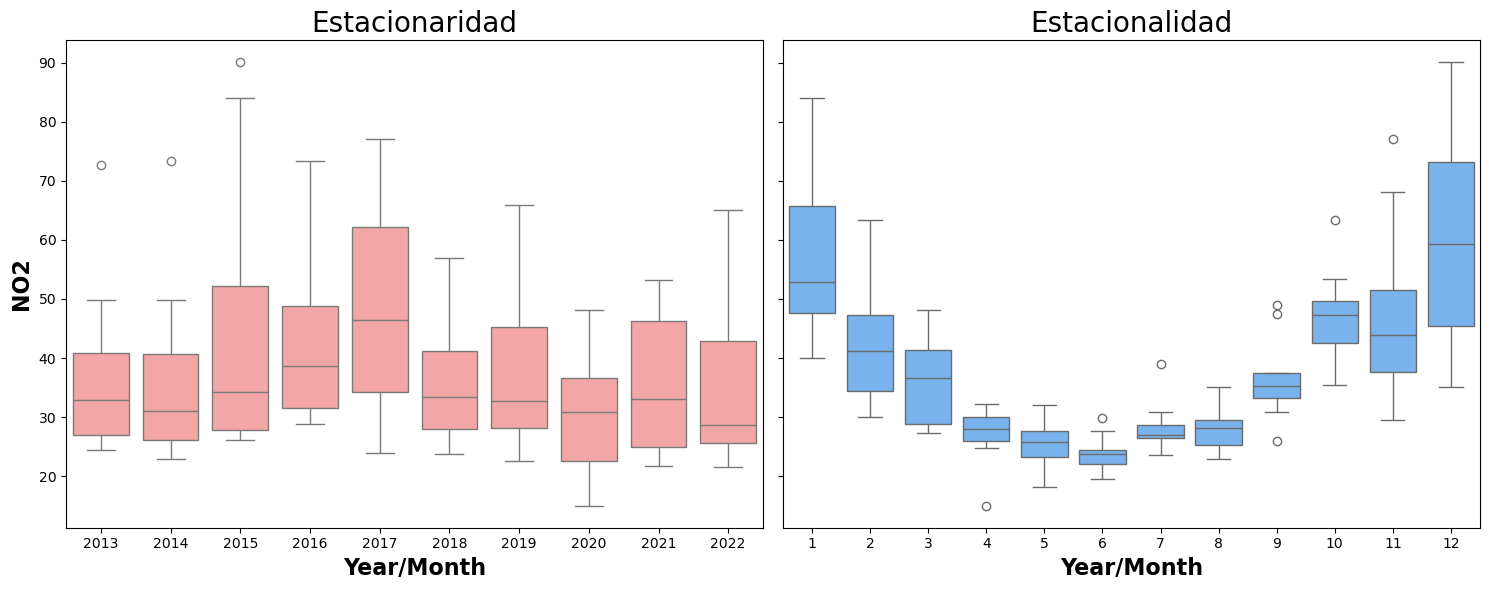

In [16]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year/Month', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [17]:
res = adfuller(df["NO2"])
res

(-1.202107670238254,
 0.6726883888571185,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 797.2517539121792)

In [18]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -1.202107670238254
p-value 0.6726883888571185
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [19]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 0.9999999999999999
1 mes Lag, 0.6296567364856057
2 mes Lag, 0.34068051811891314
3 mes Lag, 0.06576144536222397
4 mes Lag, -0.24481181787918602
5 mes Lag, -0.4226022852340803
6 mes Lag, -0.47515492759755085
7 mes Lag, -0.44498036126742124
8 mes Lag, -0.27849516520921463
9 mes Lag, 0.024887810133949858
10 mes Lag, 0.31189889072200866
11 mes Lag, 0.5555333943206852
12 mes Lag, 0.6907886703087479
13 mes Lag, 0.5889250814234103
14 mes Lag, 0.32472008431067517
15 mes Lag, 0.06755459601456677
16 mes Lag, -0.23817856368902246
17 mes Lag, -0.4086459769492786
18 mes Lag, -0.5073954436130712
19 mes Lag, -0.45974156674224737
20 mes Lag, -0.2829332064941853
21 mes Lag, -0.0103647804580623
22 mes Lag, 0.22029428880368426
23 mes Lag, 0.5602021662534646
24 mes Lag, 0.6911551276555988
25 mes Lag, 0.49822005319922474
26 mes Lag, 0.2751103444126334
27 mes Lag, -0.008131196315266055
28 mes Lag, -0.3106247535447338
29 mes Lag, -0.4976740933218696
30 mes Lag, -0.5808847287841943
31 mes Lag, -0.50

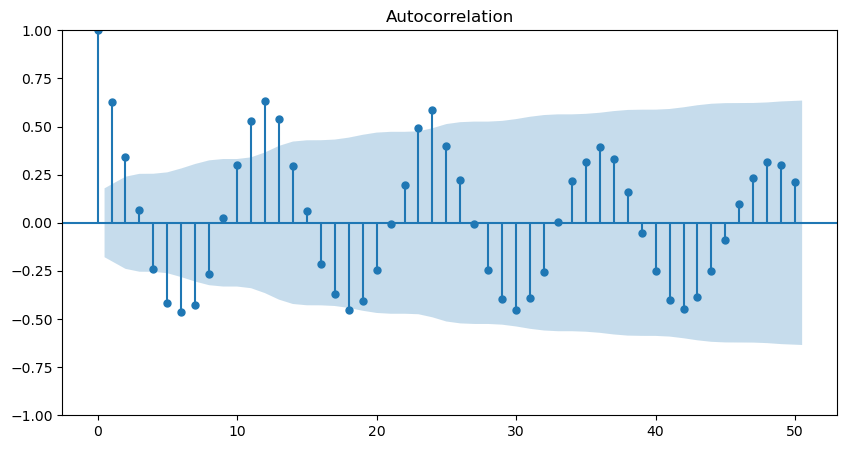

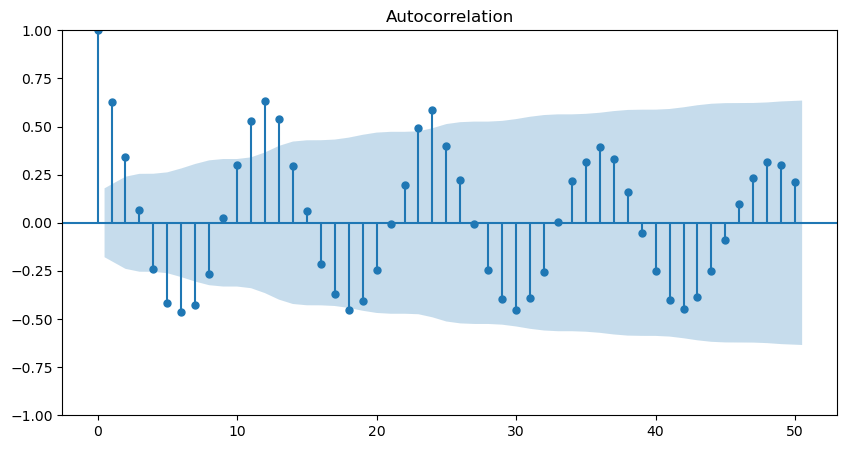

In [20]:
plot_acf(df, lags = 50)

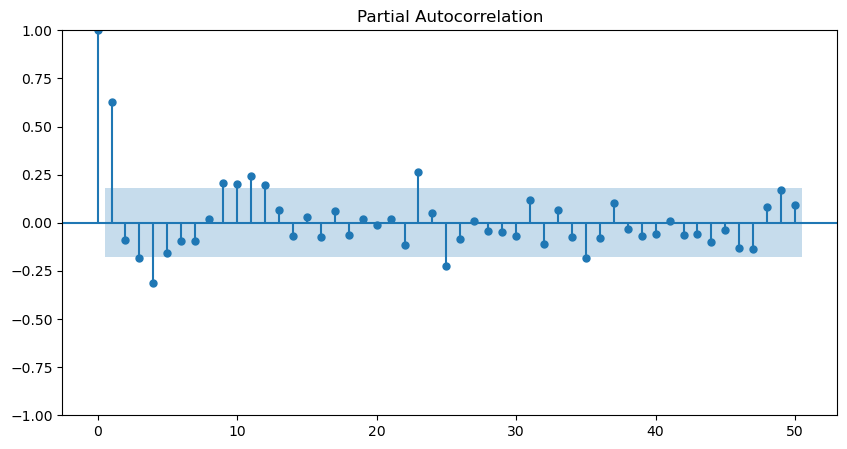

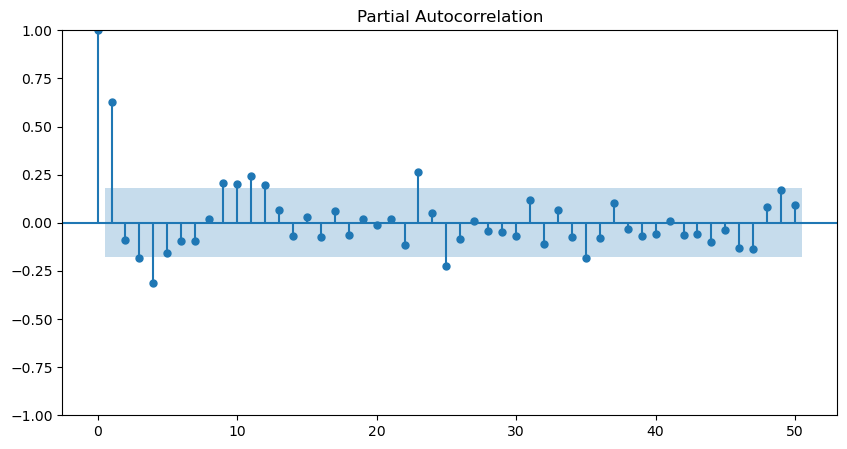

In [21]:
plot_pacf(df, lags = 50)

In [22]:
df.head()

,NO2
month,
2013-01-01,49.774194
2013-02-01,37.741935
2013-03-01,27.387097
2013-04-01,26.354839
2013-05-01,26.258065


In [23]:
df.shape

(120, 1)

In [24]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [25]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [26]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [27]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

CPU times: total: 344 ms
Wall time: 1.33 s


In [28]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
14,11.595802,"(2, 1, 2)"
7,11.609734,"(1, 1, 1)"
8,11.650726,"(1, 1, 2)"
20,11.662458,"(3, 1, 2)"
13,17.957515,"(2, 1, 1)"


In [29]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(2, 1, 2),  # modelo arima
               seasonal_order=(2, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  5.8436375442690265
CPU times: total: 203 ms
Wall time: 572 ms


,real,pred,error
2020-07-01,23.612903,24.016856,0.403953
2020-08-01,29.000000,27.794170,-1.205830
2020-09-01,32.806452,35.872023,3.065572
2020-10-01,35.419355,42.906646,7.487291
2020-11-01,47.000000,33.194380,-13.805620
2020-12-01,35.161290,56.590986,21.429696
2021-01-01,53.193548,55.110345,1.916797
2021-02-01,32.677419,51.700088,19.022668
2021-03-01,33.322581,37.550411,4.227830
2021-04-01,24.677419,23.827826,-0.849593


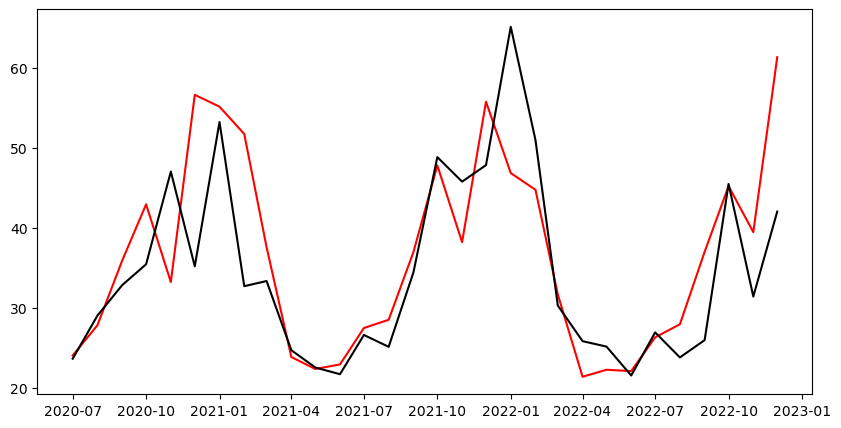

In [30]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [31]:
pred["real_test"] = y_test

In [32]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,54.370670
2023-02-01,46.902636
2023-03-01,36.788659
2023-04-01,25.578152
2023-05-01,24.170672
2023-06-01,23.642309
2023-07-01,27.946900
2023-08-01,28.271418
2023-09-01,37.450523
2023-10-01,47.606554


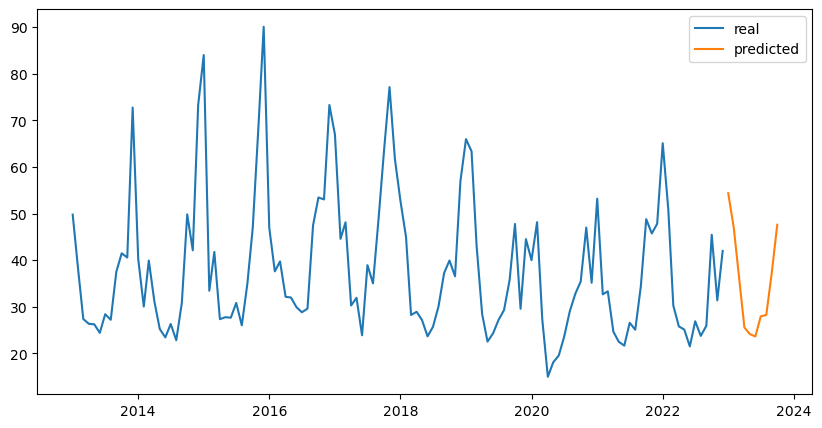

In [33]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [34]:
pred_año

,predicted_mean
2023-01-01,54.370670
2023-02-01,46.902636
2023-03-01,36.788659
2023-04-01,25.578152
2023-05-01,24.170672
2023-06-01,23.642309
2023-07-01,27.946900
2023-08-01,28.271418
2023-09-01,37.450523
2023-10-01,47.606554


## Datos reales 2023

In [35]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [36]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


In [37]:
df_17_23 = df23[df23["ESTACION"] == 17]
df_17_23

,Unnamed: 0,ESTACION,ANO,MES,NO2
39,39,17,2023,1,48.322581
40,40,17,2023,2,44.612903
41,41,17,2023,3,35.677419
42,42,17,2023,4,29.354839
43,43,17,2023,5,20.258065
44,44,17,2023,6,27.064516
45,45,17,2023,7,30.419355
46,46,17,2023,8,26.677419
47,47,17,2023,9,38.096774
48,48,17,2023,10,43.096774


In [38]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [39]:
estacion_timeseries(df_17_23)

,Unnamed: 0,NO2
month,,
2023-01-01,39,48.322581
2023-02-01,40,44.612903
2023-03-01,41,35.677419
2023-04-01,42,29.354839
2023-05-01,43,20.258065
2023-06-01,44,27.064516
2023-07-01,45,30.419355
2023-08-01,46,26.677419
2023-09-01,47,38.096774


In [40]:
df_17_23.drop("Unnamed: 0", axis=1, inplace=True)

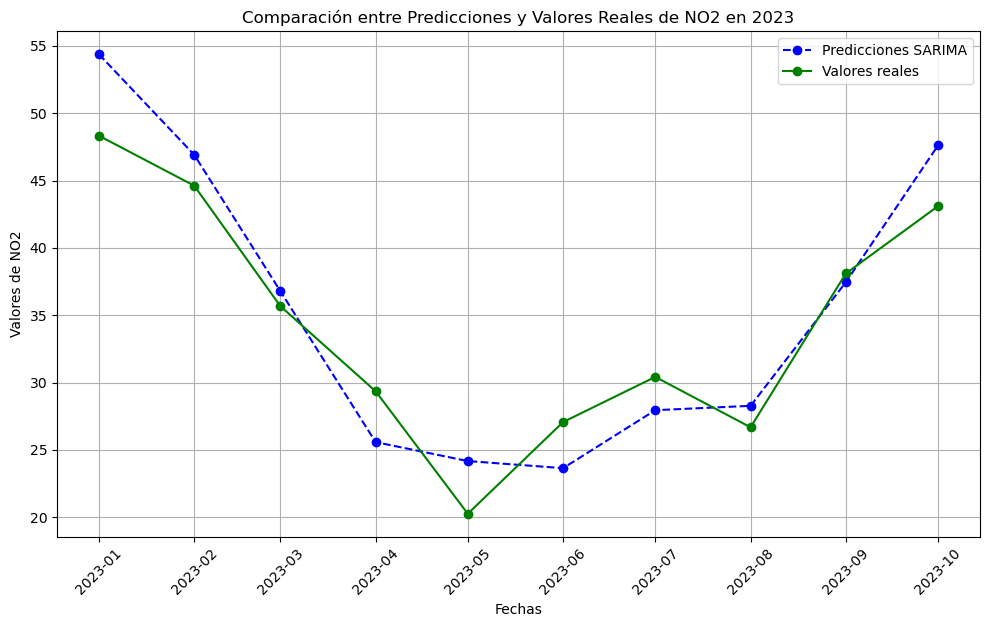

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


pred_año.index = pd.to_datetime(pred_año.index)
df_17_23.index = pd.to_datetime(df_17_23.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = df_17_23['NO2']['2023-01':'2023-10']

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

plt.show()

In [42]:
pred_año["predicted_mean"]
df_17_23["NO2"]

month
2023-01-01    48.322581
2023-02-01    44.612903
2023-03-01    35.677419
2023-04-01    29.354839
2023-05-01    20.258065
2023-06-01    27.064516
2023-07-01    30.419355
2023-08-01    26.677419
2023-09-01    38.096774
2023-10-01    43.096774
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [43]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,54.370670
2023-02-01,46.902636
2023-03-01,36.788659
2023-04-01,25.578152
2023-05-01,24.170672
2023-06-01,23.642309
2023-07-01,27.946900
2023-08-01,28.271418
2023-09-01,37.450523
2023-10-01,47.606554


In [44]:
# Suponiendo que df_17_23 y pred_año_total son tus DataFrames y ambos tienen índices basados en fechas
# Asegúrate de tener la columna 'predicted_mean' en tu DataFrame pred_año_total

# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de df_17_23 preservando el índice de fechas
frames = [df_17_23, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,48.322581
2023-02-01,44.612903
2023-03-01,35.677419
2023-04-01,29.354839
2023-05-01,20.258065
2023-06-01,27.064516
2023-07-01,30.419355
2023-08-01,26.677419
2023-09-01,38.096774
2023-10-01,43.096774


In [45]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    37.137076
dtype: float64

In [46]:
df17_23avg = df_predict23.to_frame()

In [47]:
df17_23avg = df17_23avg.rename(columns={0: "Villaverde"})

In [48]:
df17_23avg.to_csv('../../clean_visuals/predicts23/17_Villaverde.csv', index=True)